In [ ]:
# This reads in SDSS spectra, clips them to restrict them to the wavelength range of 
# interest, and calculates the S/N given the unnormalized flux and noise from SDSS

# Created 2021 July 18 by E.S.

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# path stems

stem = "/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/"

In [3]:
# read in each file, clip, find S/N

file_names = glob.glob(stem + "*dat")

In [4]:
file_names

['/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/RU_Psc_17_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/AR_Per_14_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/T_Sex__06_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/X_Ari__05_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/TU_UMa_06_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/AR_Per_08_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/final/TT_Lyn_03_noise_ver_000.dat',
 '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20220803_01_mcd/realizations_output/norm/fina

0


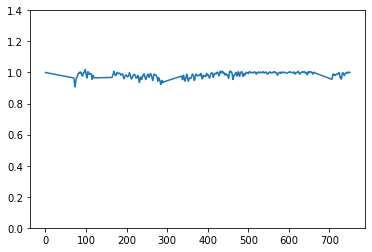

1


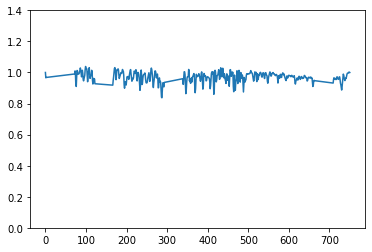

2


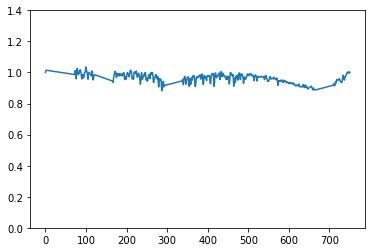

3


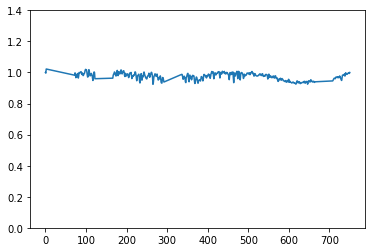

4


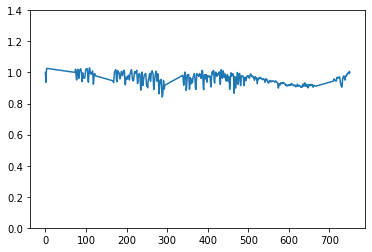

5


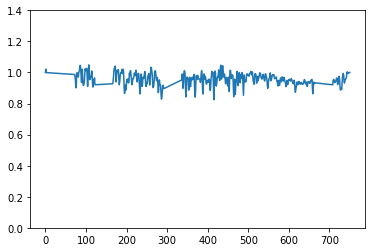

6


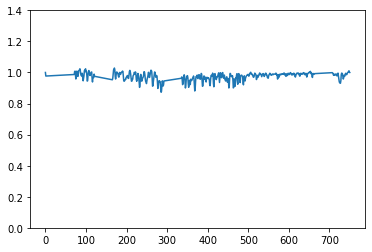

7


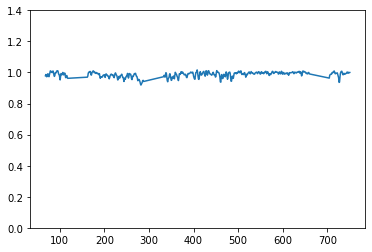

8


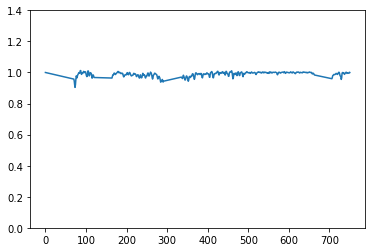

9


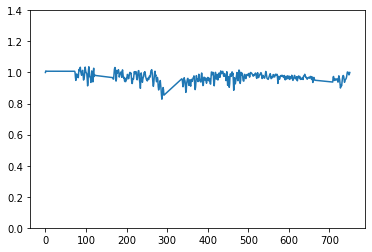

10


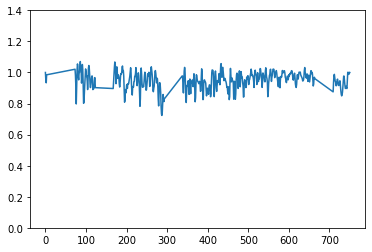

11


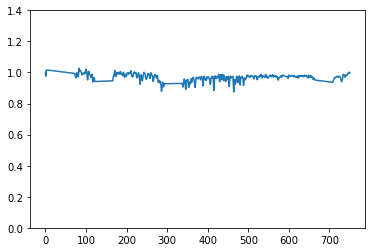

12


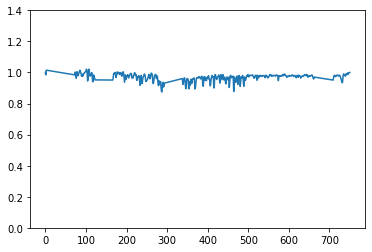

13


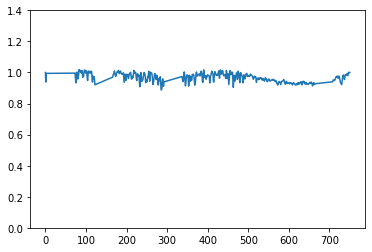

14


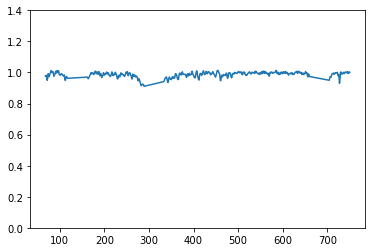

15


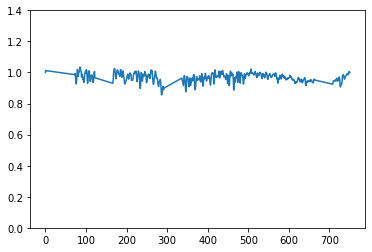

16


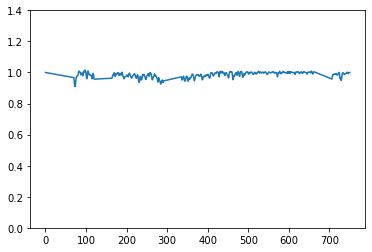

17


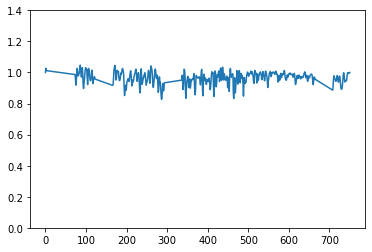

18


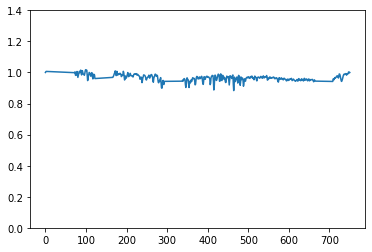

19


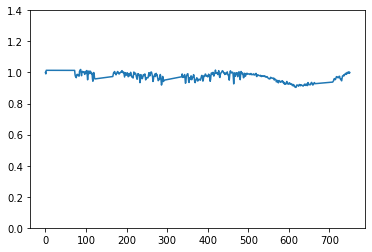

20


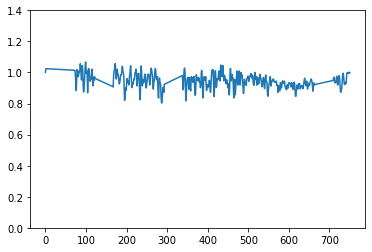

21


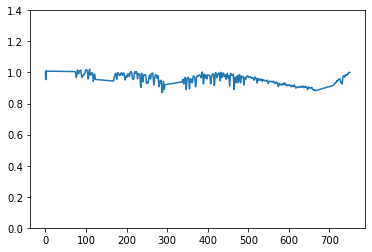

22


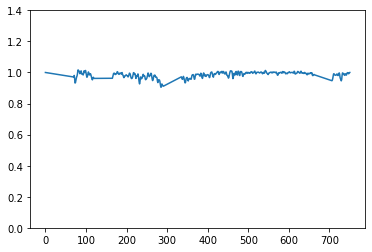

23


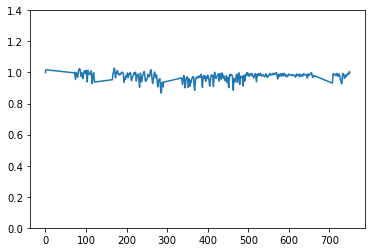

24


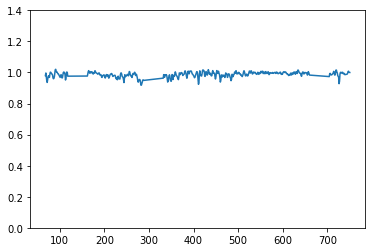

25


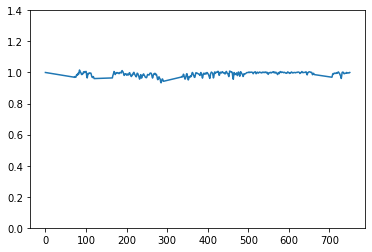

26


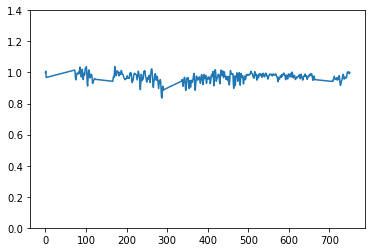

27


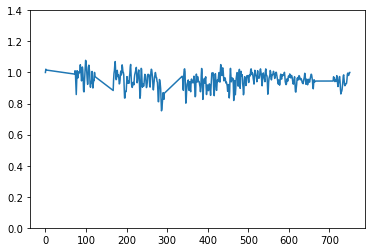

28


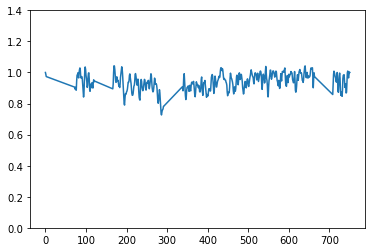

29


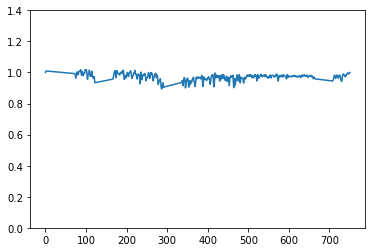

30


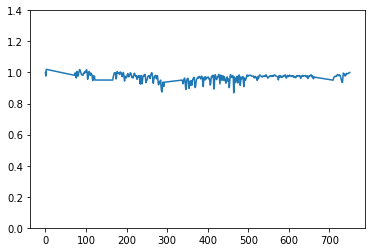

31


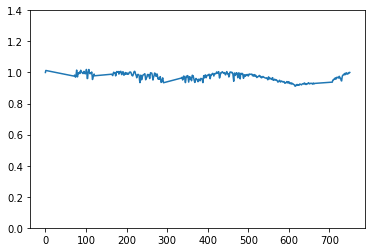

32


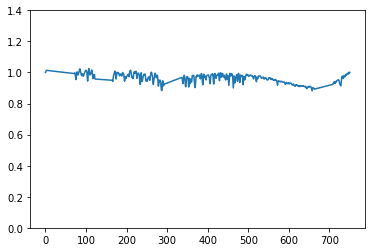

33


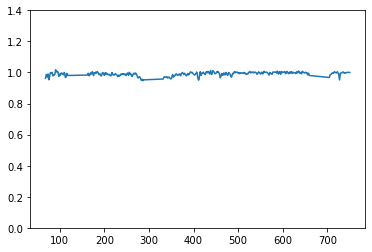

34


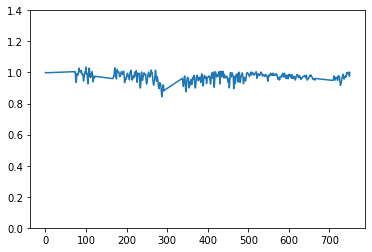

35


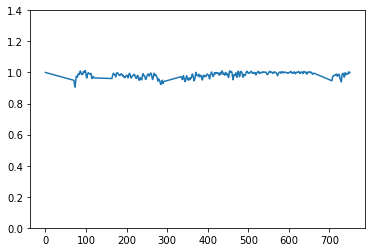

36


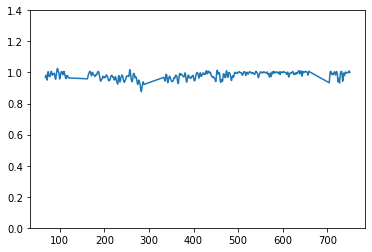

37


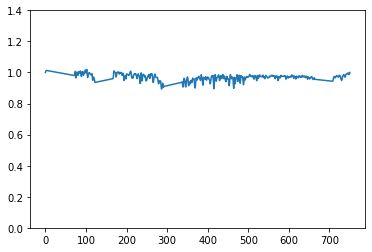

38


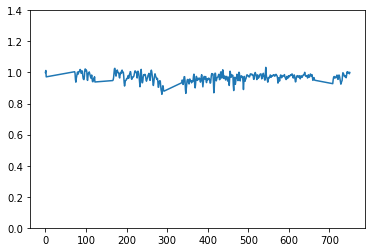

39


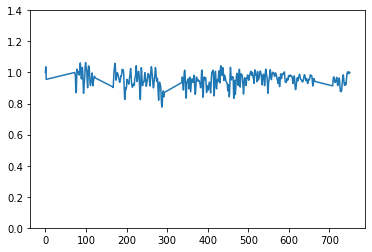

40


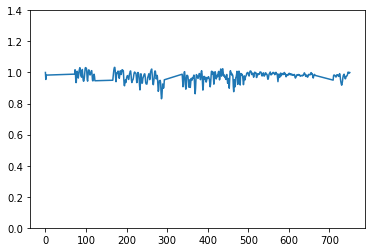

41


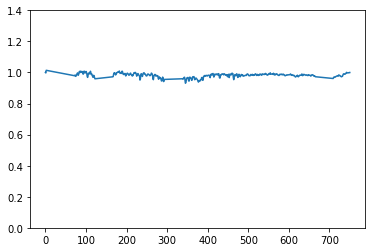

42


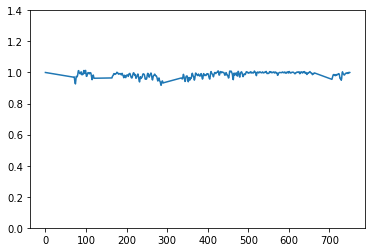

43


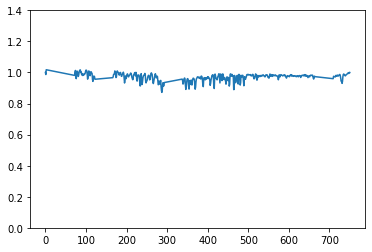

44


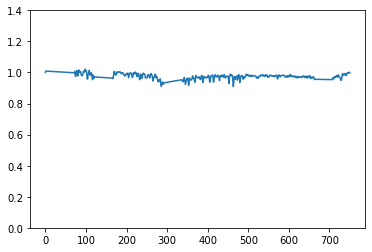

45


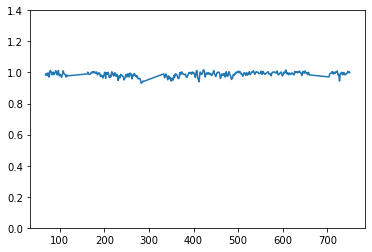

46


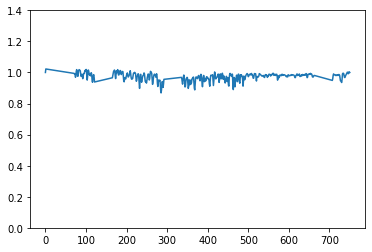

47


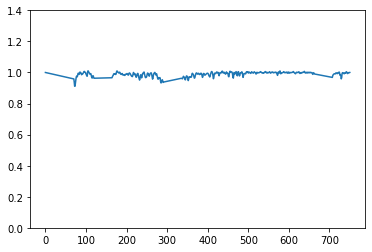

48


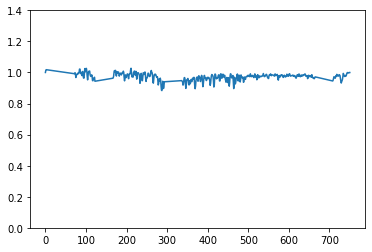

49


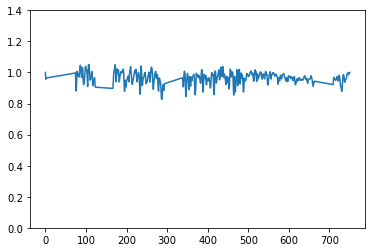

50


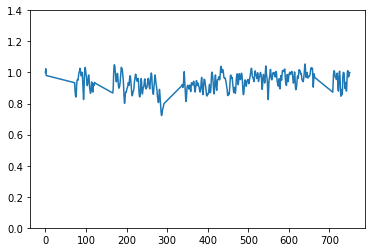

51


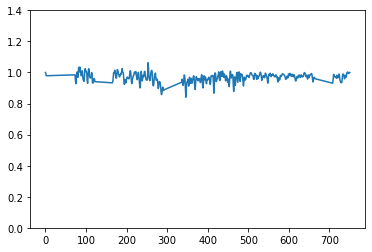

52


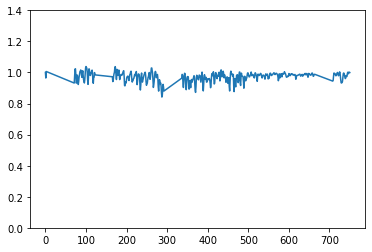

53


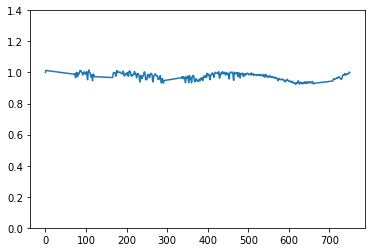

54


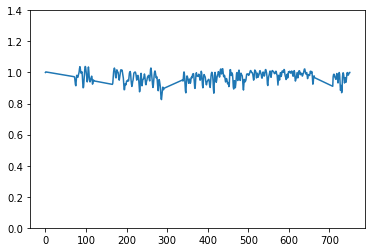

55


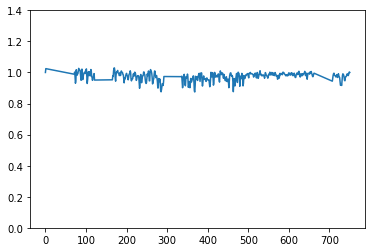

56


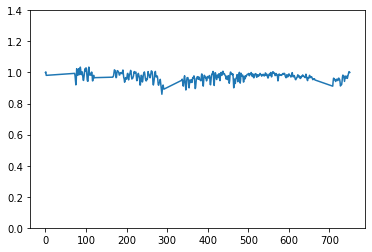

57


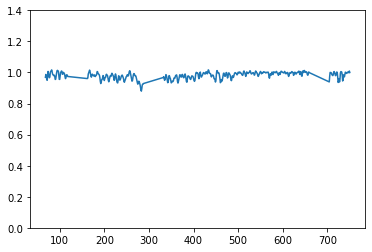

58


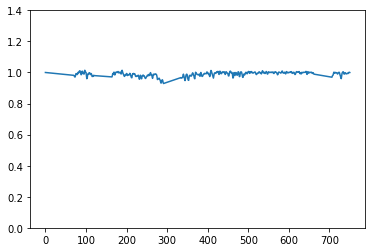

59


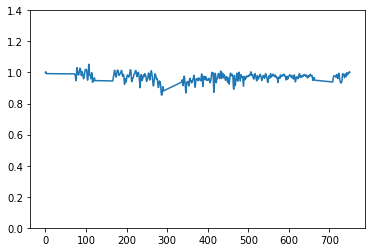

60


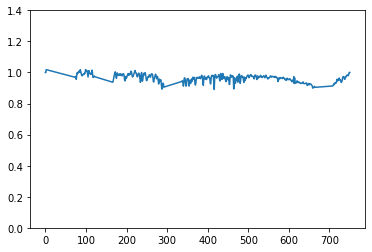

61


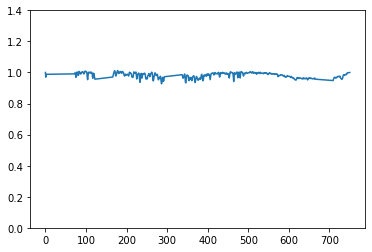

62


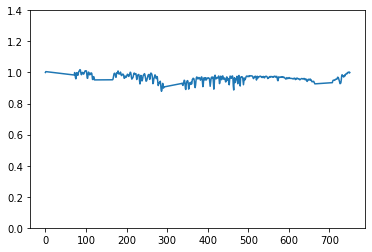

63


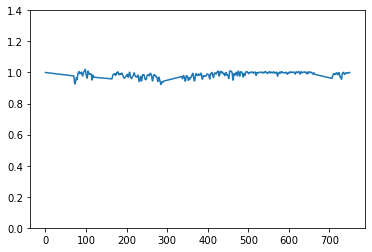

64


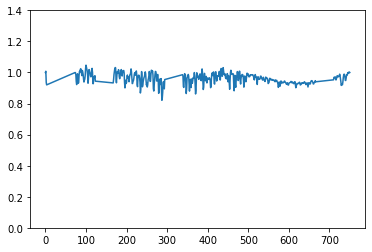

65


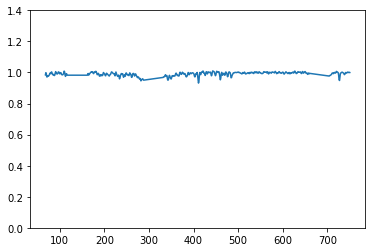

66


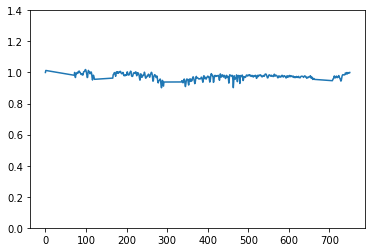

67


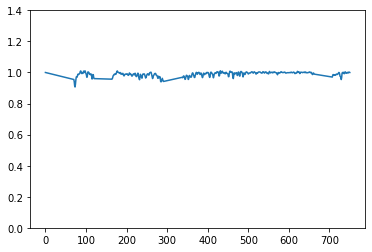

68


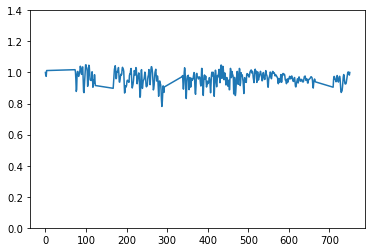

69


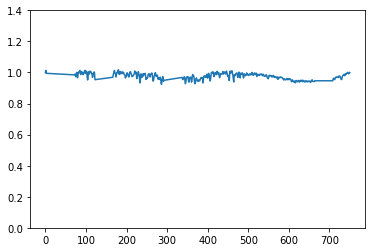

70


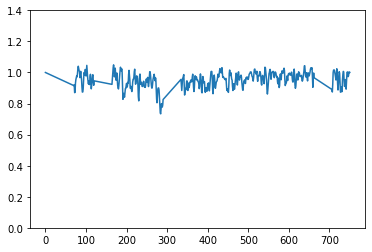

71


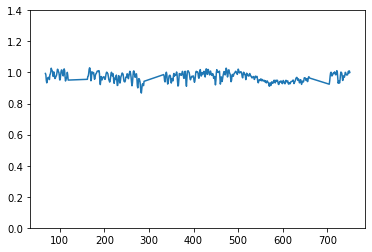

72


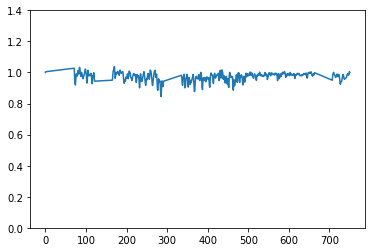

73


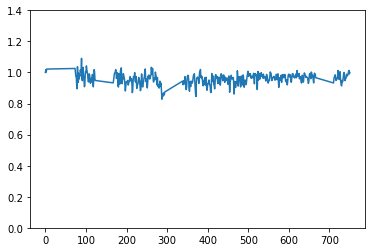

74


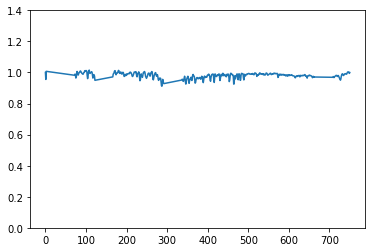

75


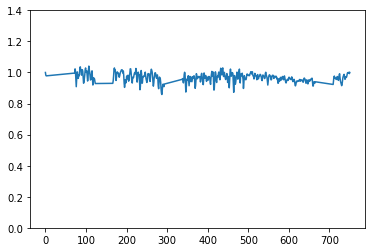

76


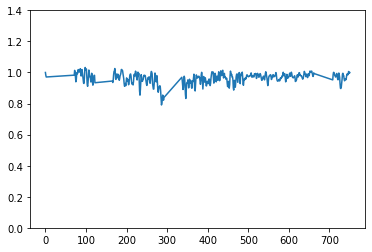

77


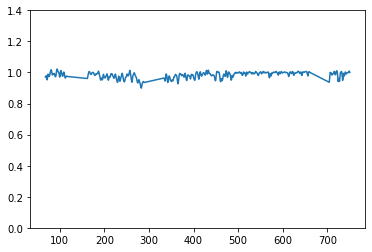

78


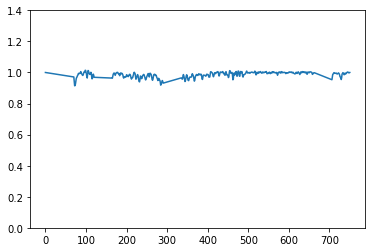

79


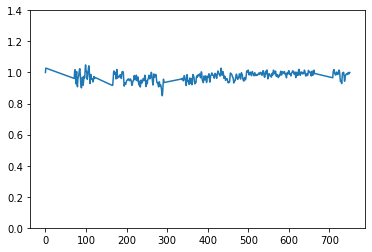

80


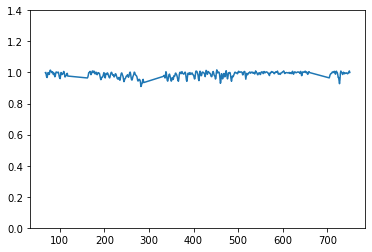

81


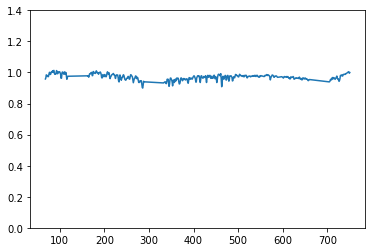

82


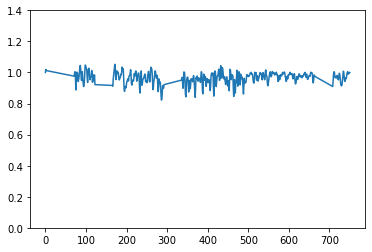

83


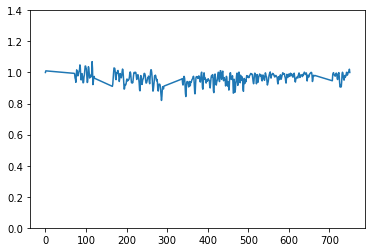

84


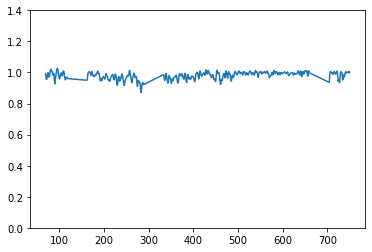

85


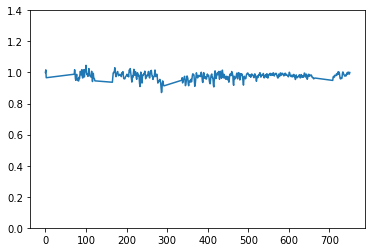

86


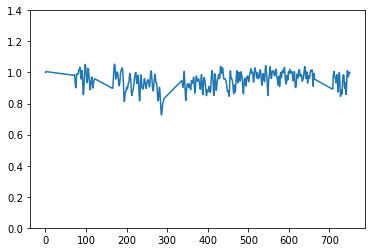

87


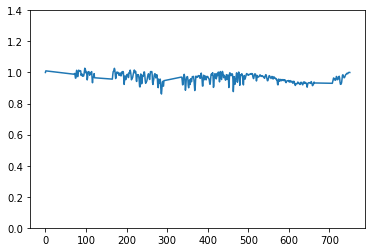

88


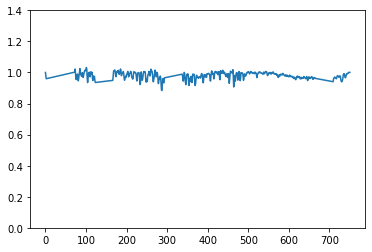

89


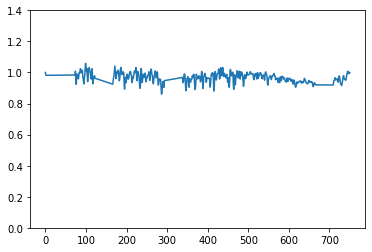

90


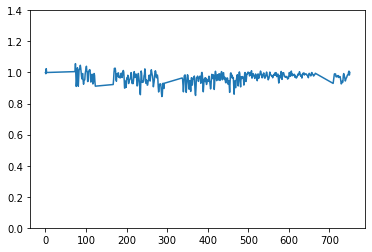

91


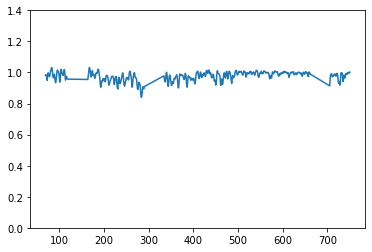

92


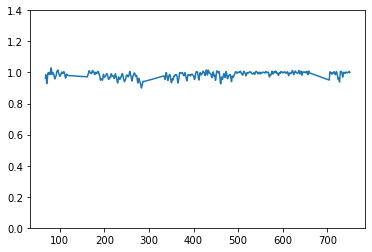

93


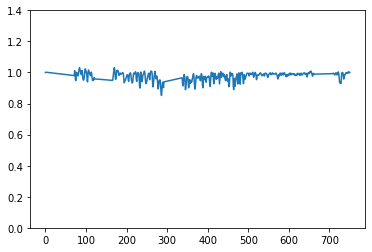

94


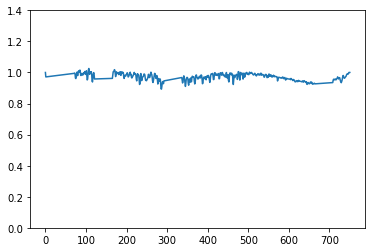

95


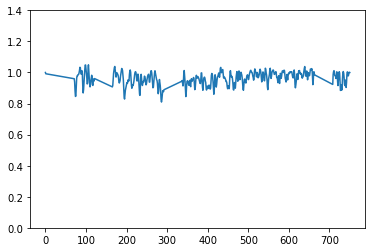

96


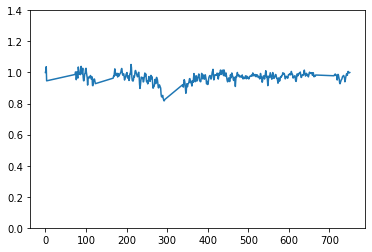

97


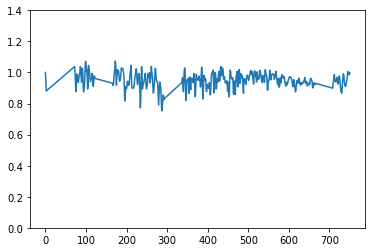

98


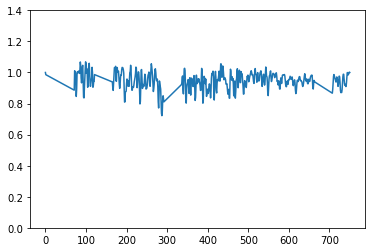

99


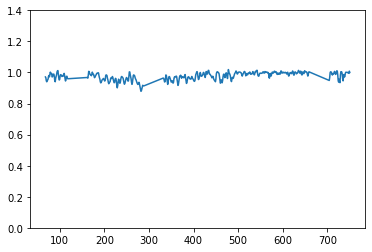

100


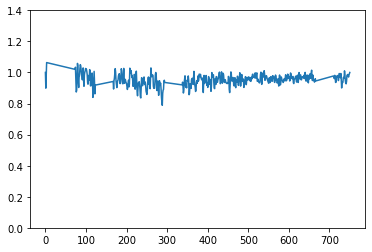

101


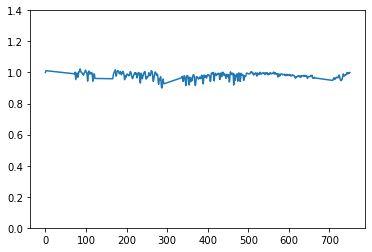

102


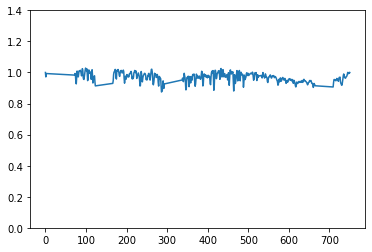

103


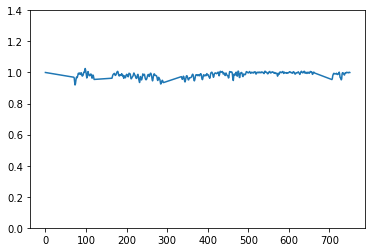

104


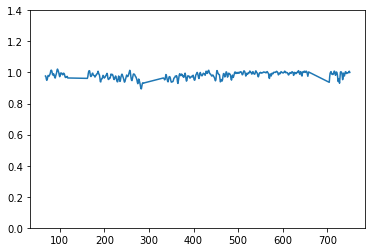

105


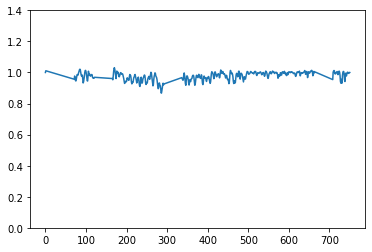

106


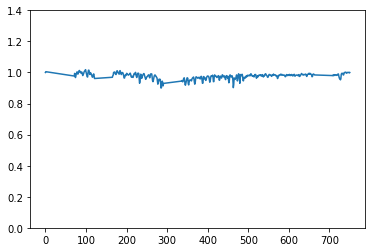

107


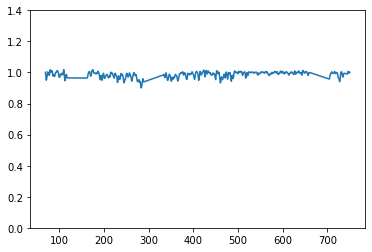

108


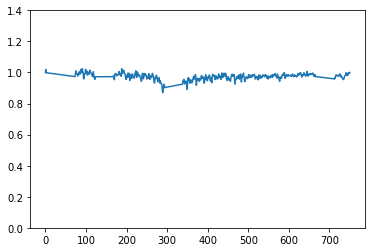

109


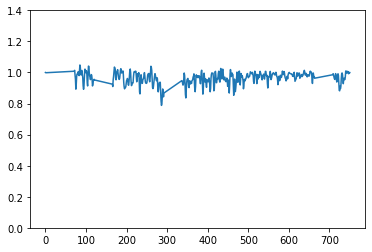

110


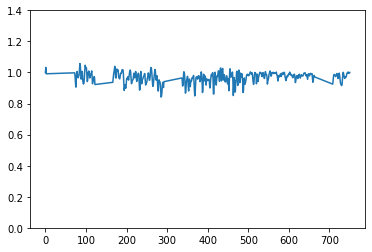

111


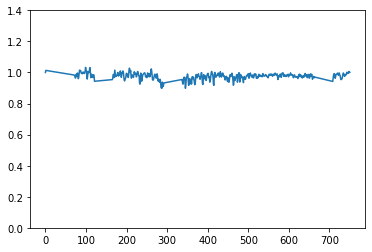

112


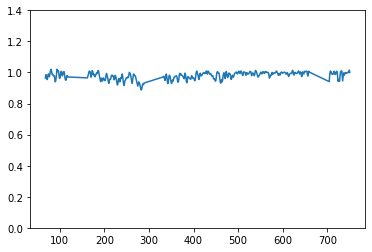

113


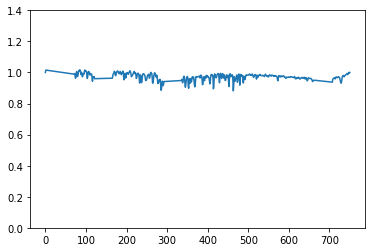

114


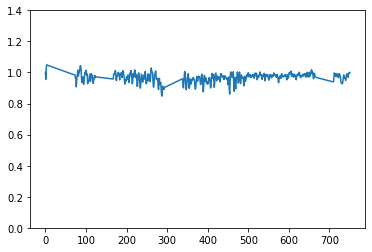

115


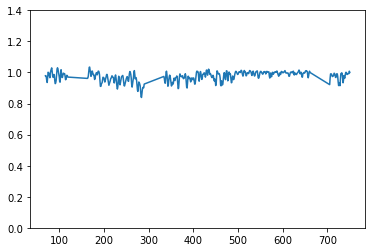

116


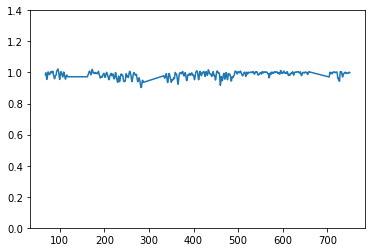

117


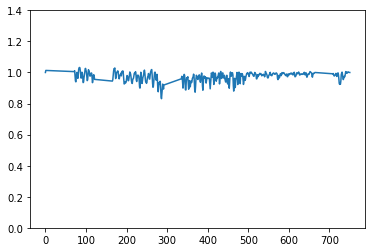

118


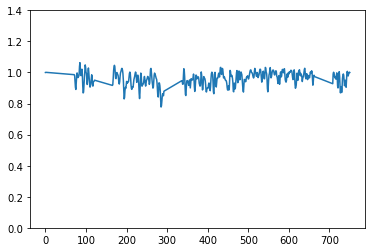

119


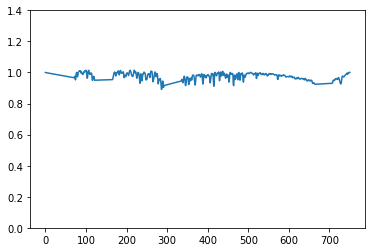

120


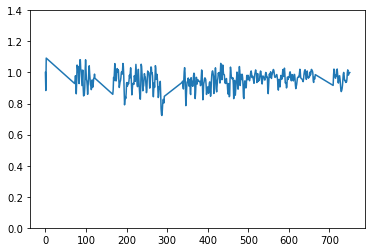

121


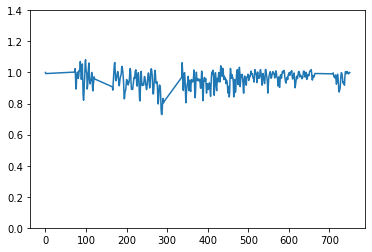

122


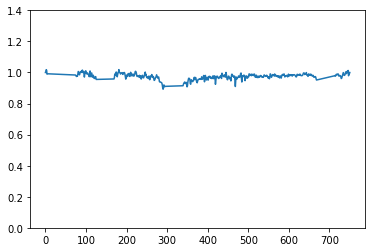

123


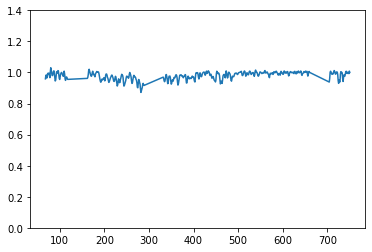

124


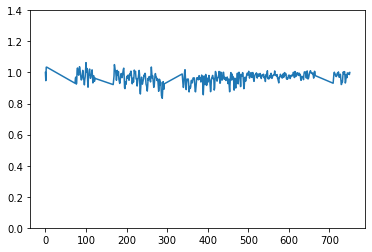

125


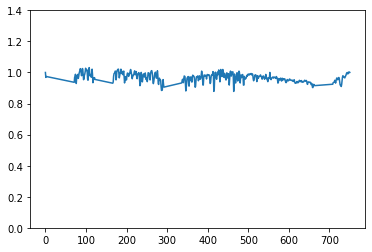

126


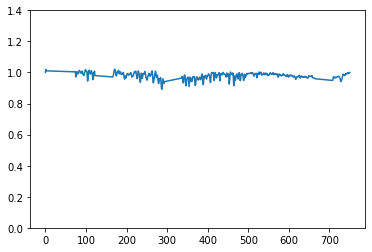

127


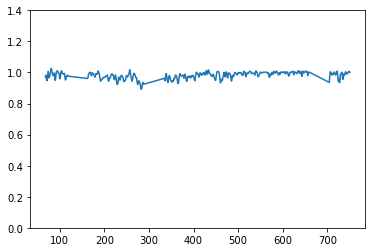

128


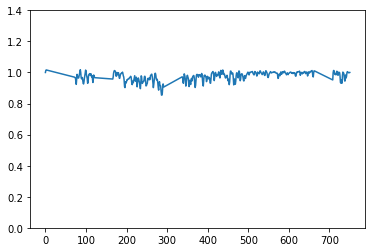

129


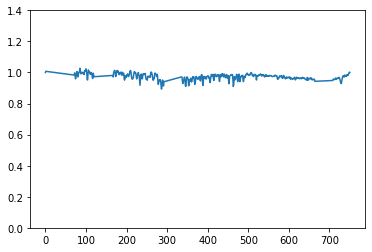

130


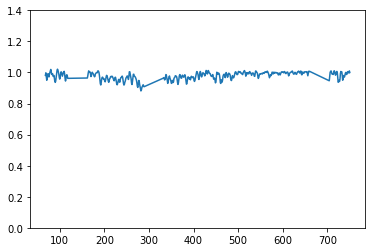

131


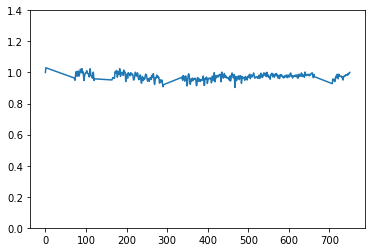

132


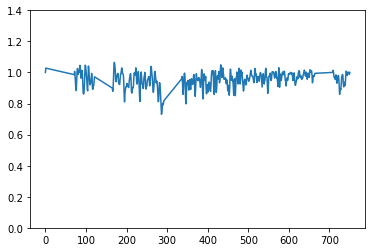

133


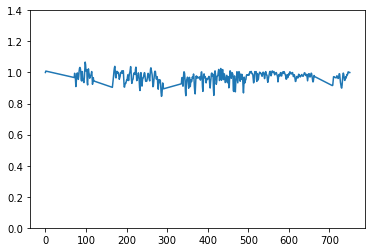

134


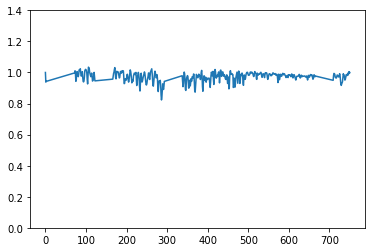

135


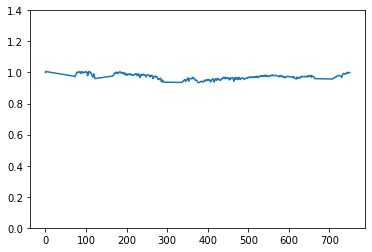

136


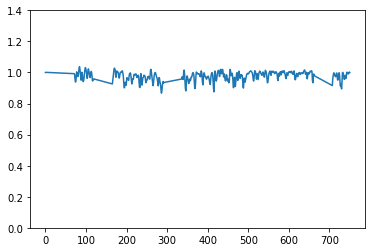

137


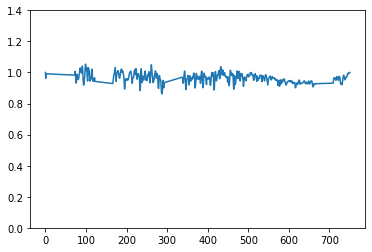

138


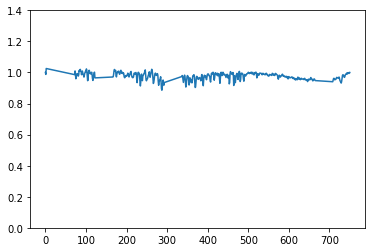

139


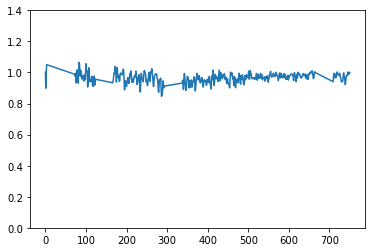

140


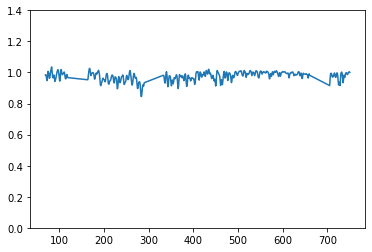

141


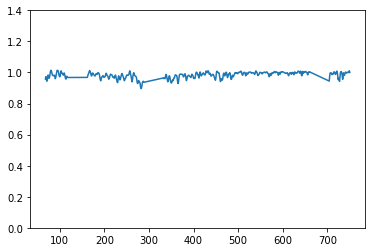

142


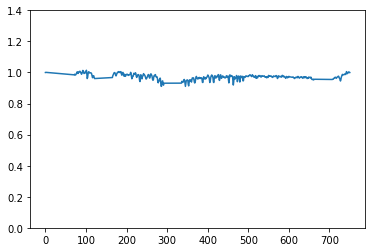

143


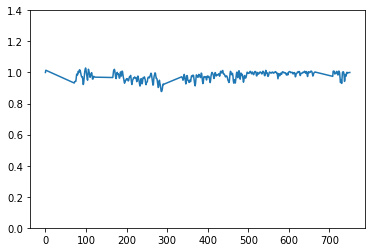

144


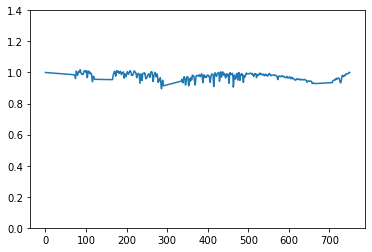

145


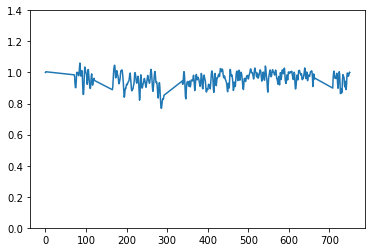

146


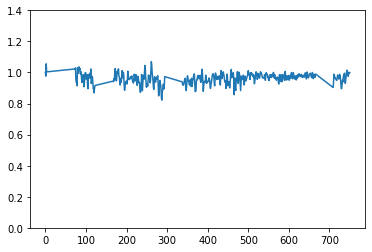

147


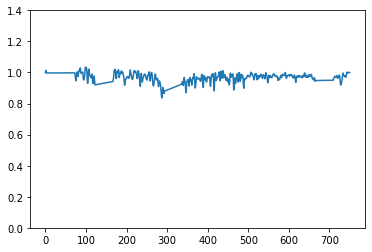

148


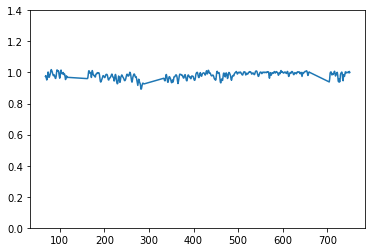

149


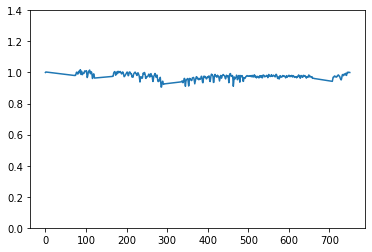

150


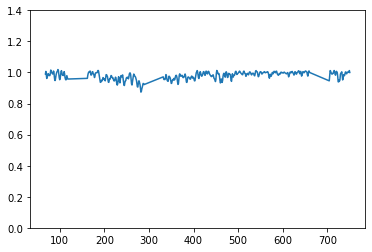

151


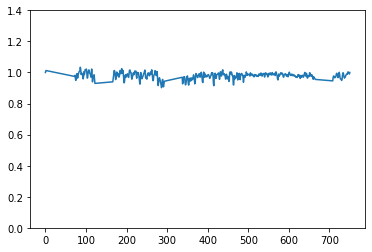

152


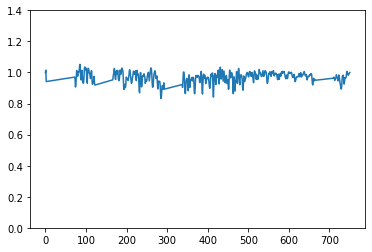

153


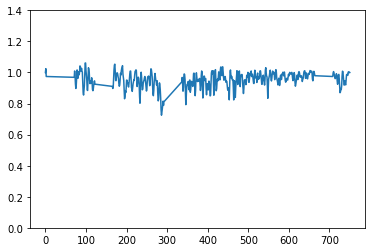

154


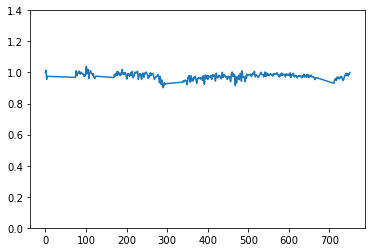

155


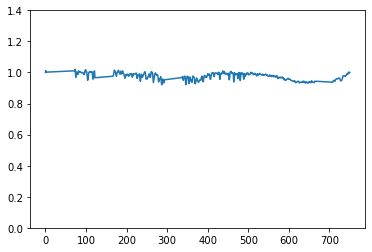

156


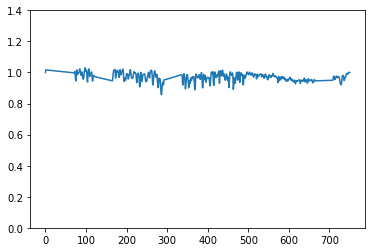

157


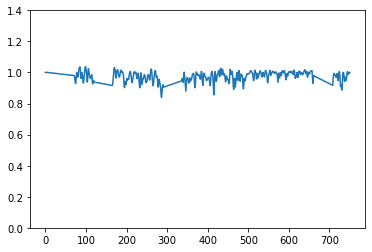

158


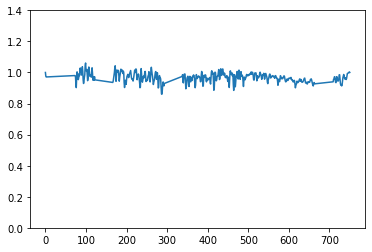

159


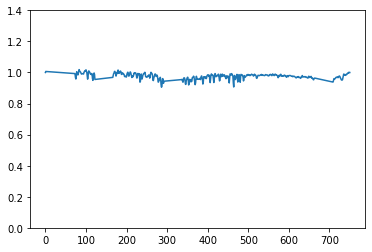

160


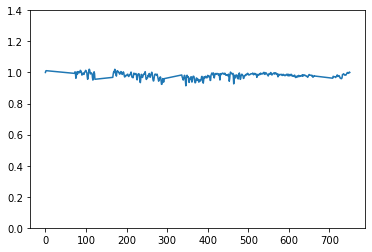

161


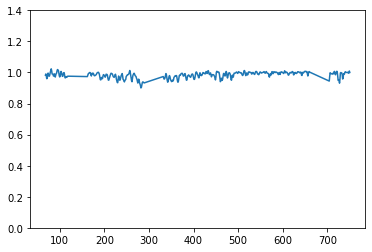

162


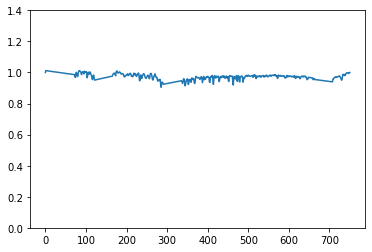

163


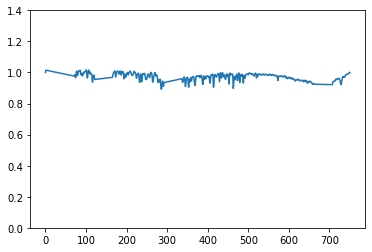

164


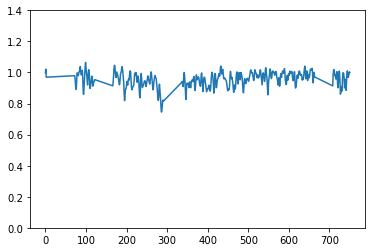

165


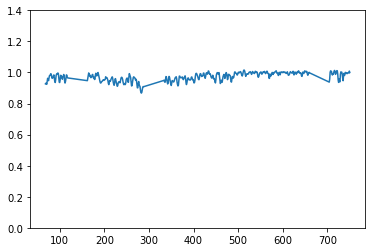

166


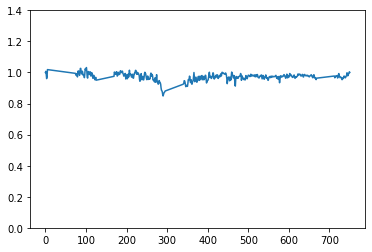

167


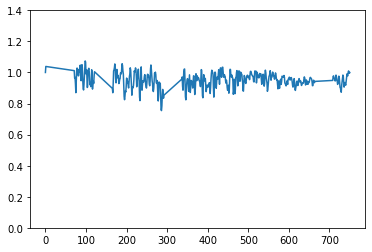

168


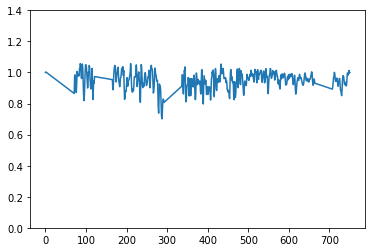

In [6]:
# match S/N with the right file in the table containing Robospect data

#df_s_to_n = pd.DataFrame(columns=["file_name","s_to_n"])
dict_s_to_n = {"file_name":[], "s_to_n":[]}

for spec_num in range(0,len(file_names)):
    print(spec_num)
    this_spectrum = pd.read_csv(file_names[spec_num], names=["wavel","flux"], delim_whitespace=True)
    #this_spectrum["s_to_n_spec"] = np.divide(this_spectrum["flux"],this_spectrum["noise"])

    # mask out absorption line regions
    caii_K_line = np.logical_and(this_spectrum["wavel"] >= 3933.66-30,this_spectrum["wavel"] <= 3933.66+30)
    h_eps_line = np.logical_and(this_spectrum["wavel"] >= 3970.075-30,this_spectrum["wavel"] <= 3970.075+30)
    h_del_line = np.logical_and(this_spectrum["wavel"] >= 4101.71-30,this_spectrum["wavel"] <= 4101.71+30)
    h_gam_line = np.logical_and(this_spectrum["wavel"] >= 4340.472-30,this_spectrum["wavel"] <= 4340.472+30)
    h_beta_line = np.logical_and(this_spectrum["wavel"] >= 4861.29-30,this_spectrum["wavel"] <= 4861.29+30)
    # sum across the arrays
    sum_array = np.sum([np.array(caii_K_line),
                        np.array(h_eps_line),
                        np.array(h_del_line),
                        np.array(h_gam_line),
                        np.array(h_beta_line)],axis=0)
    # convert to boolean column (True == 'there is an absorption line here')
    line_bool_array = np.array(sum_array, dtype=bool)
    this_spectrum["line_regions"] = line_bool_array
    idx_outside_lines = this_spectrum.index[this_spectrum["line_regions"] == False].tolist()

    net_s_to_n = np.divide(1.,np.std(this_spectrum["flux"].loc[idx_outside_lines]))

    dict_s_to_n["s_to_n"].append(net_s_to_n)
    dict_s_to_n["file_name"].append(os.path.basename(file_names[spec_num])) # dummy for now
    #df_s_to_n = df_s_to_n.append({"file_name": np.nan,"s_to_n": net_s_to_n})
    
    #print("Net S/N: ")
    #print(net_s_to_n)
    
    plt.clf()
    plt.plot(this_spectrum["flux"].loc[idx_outside_lines])
    plt.ylim([0,1.4])
    plt.show()

In [8]:
df_s_to_n = pd.DataFrame.from_dict(dict_s_to_n)

In [9]:
# write to file

df_s_to_n.to_csv("junk.csv")

In [10]:
df_s_to_n.describe()

,s_to_n
count,169.000000
mean,41.583741
std,14.065127
min,17.953570
25%,31.983043
50%,39.641897
75%,51.123746
max,84.440773


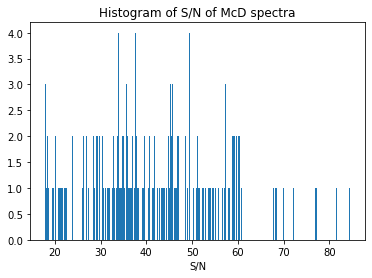

In [12]:
plt.hist(df_s_to_n["s_to_n"], bins=300)
plt.xlabel("S/N")
plt.title("Histogram of S/N of McD spectra")
plt.savefig("junk.png",dpi=300)

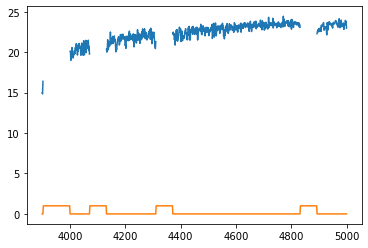

In [10]:
# write out

plt.plot(this_spectrum["wavel"],this_spectrum["s_to_n_spec"])
plt.plot(this_spectrum["wavel"],this_spectrum["line_regions"])
plt.show()

/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: '>=' not supported between instances of 'float' and 'list'

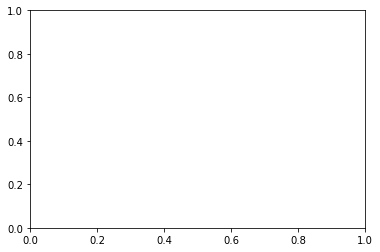

In [17]:
plt.hist(array_net_s_to_n)
plt.show()